In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_66246_R')

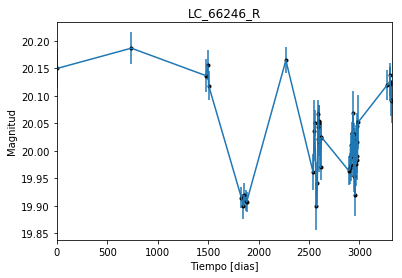

In [2]:
data = np.genfromtxt('LC_66246_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_66246_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

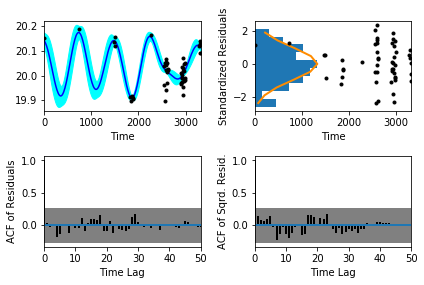

In [5]:
sample.assess_fit()

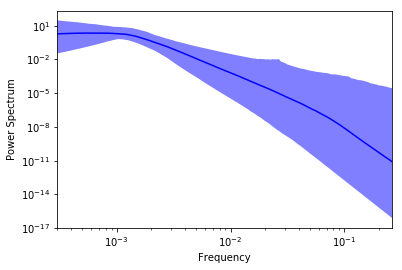

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_66246_R')

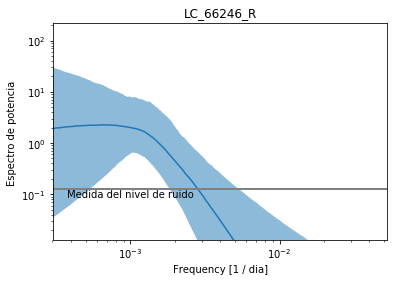

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_66246_R')

Text(0.5,1,'Prediccion , valor esperado LC_66246_R')

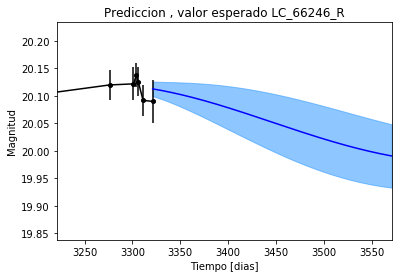

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_66246_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_66246_R')

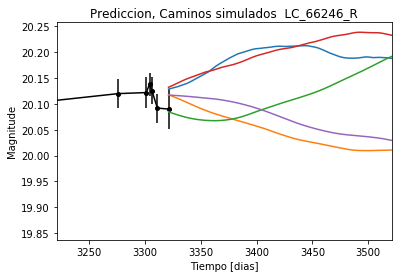

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_66246_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_66246_R')

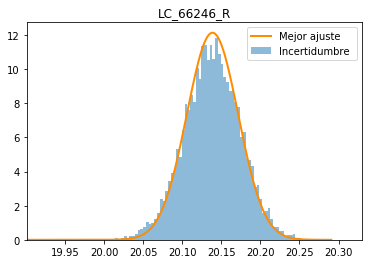

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_66246_R')

Text(0.5,1,'Interpolacion, camino simulado LC_66246_R')

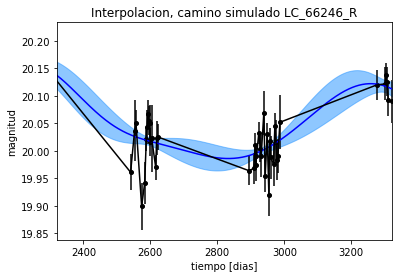

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66246_R')

Text(0.5,1,'Interpolacion, camino simulado LC_66246_R')

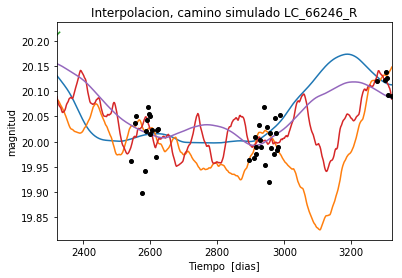

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66246_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 601.025016772
Median: 0.00142879621719
Standard deviation: 0.0762875928876
68% credibility interval: [ 0.00038997  0.03425288]
95% credibility interval: [ 0.00031603  0.30815896]
99% credibility interval: [  3.04073550e-04   4.69579548e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1679.62947051
Median: 0.000850586618074
Standard deviation: 0.0442104454205
68% credibility interval: [ 0.00037128  0.011847  ]
95% credibility interval: [ 0.00031413  0.12614374]
99% credibility interval: [  3.03600878e-04   3.33006012e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 504.900836604
Median: 0.00584148421047
Standard deviat

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 302.180641297
Median: 108.112994363
Standard deviation: 2.06052395006
68% credibility interval: [ 106.07133102  109.92247353]
95% credibility interval: [ 103.19549201  111.64395637]
99% credibility interval: [ 101.10007293  112.22776692]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 494.578611181
Median: 0.31939431288
Standard deviation: 1.01732512327
68% credibility interval: [ 0.02979968  1.91657639]
95% credibility interval: [ 0.01070145  3.26418672]
99% credibility interval: [ 0.0085934   4.87167678]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 369.926083478
Median: 0.0353013241689
Standard deviation: 1.89177568758
68% credibility interval: [ 0.00165662  0.75621065]
95% credibility interval: [  1.54498913e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3706.92278522
Median: 1.42508433208e-06
Standard deviation: 8.43764560335e+92
68% credibility interval: [  3.91192581e-55   8.10185496e+41]
95% credibility interval: [  8.37511926e-177   1.77924961e+056]
99% credibility interval: [  1.35877848e-190   1.00608775e+085]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 910.529642101
Median: 20.0675424208
Standard deviation: 0.0480859923544
68% credibility interval: [ 20.03947288  20.11224487]
95% credibility interval: [ 20.00438028  20.19192628]
99% credibility interval: [ 19.95308779  20.28580673]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 466.867739382
Median: 0.00138389084558
Standard deviation: 0.102897907641
68% credibility interval: [ 0.          0.09681488]
95% credibility interval: [ 0.          0.40950445]
99% credibility interval: [ 0.          0.49887894]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 466.867739382
Median: 0.00138389084558
Standard deviation: 0.102897907641
68% credibility interval: [ 0.          0.09681488]
95% credibility interval: [ 0.          0.40950445]
99% credibility interval: [ 0.          0.49887894]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 369.253456974
Median: 0.0
Standard deviation: 0.000549750357049
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 302.180641297
Median: 108.112994363
Standard deviation: 2.06052395006
68% credibility interval: [ 106.07133102  109.92247353]
95% credibility interval: [ 103.19549201  111.64395637]
99% credibility interval: [ 101.10007293  112.22776692]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1059.50468919
Median: 0.00881395965686
Standard deviation: 0.0143775194427
68% credibility interval: [ 0.00492161  0.01753454]
95% credibility interval: [ 0.00319956  0.04802236]
99% credibility interval: [ 0.00239221  0.09741715]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1467.19844921
Median: 1.16788445817
Standard deviation: 0.199682545564
68% credibility interval: [ 0.97228281  1.36816972]
95% credibility interval: [ 0.83024416  1.60065945]
99% credibility interval: [ 0.74210436  1.81486096]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1207.62102531
Median: 3.28478055566e-07
Standard deviation: 0.00248363666347
68% credibility interval: [  6.89478810e-47   3.40987104e-05]
95% credibility interval: [  6.97911199e-62   1.04559547e-03]
99% credibility interval: [  1.92102783e-89   7.63882222e-03]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 601.025016772
Median: (-0.00897739139878-0.0108977607869j)
Standard deviation: 0.804831064132
68% credibility interval: [-0.21521722-0.54376606j -0.00245024-0.19837694j]
95% credibility interval: [-1.93621986-1.57241195j -0.00198565-0.00792636j]
99% credibility interval: [ -2.95045531e+00-1.83854532j  -1.91055046e-03-0.00964335j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1679.62947051
Median: (-0.00534439334117+0.00401155970678j)
Standard deviation: 0.703675881132
68% credibility interval: [-0.07443689+2.90568163j -0.00233279+0.00658909j]
95% credibility interval: [-0.79258451+1.9362147j  -0.00197372+0.00776423j]
99% credibility interval: [ -2.09233848e+00+3.18192175j  -1.90758058e-03+0.00552612j]
Posterior summa